In [3]:
import pandas as pd
import numpy as np

In [4]:
casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [5]:
casos.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
268,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1439,1440,1441,1451,1454,1456,1465,1474,1482,1494,1497,1504,1505,1509,1512,1513,1514,1515,1520,1521,1531,1536,1537,1537,1539,1540,1544,1546,1548,1548,1548,1549,1551,1553,1651,1657,1767,1817,1850,1882
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130598,131904,133093,134310,135459,136736,138004,139223,140287,141219,142228,143169,144257,145252,146074,146701,147400,148171,148968,149769,150505,151142,151569,152031,152555,153093,153590,154063,154557,155006,155414,155884,156393,156996,157593,158168,158559,158962,159443,159956
270,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2092,2092,2094,2096,2096,2097,2099,2101,2101,2101,2101,2101,2102,2104,2104,2104,2104,2105,2107,2109,2110,2111,2112,2112,2113,2115,2115,2115,2118,2118,2118,2118,2119,2120,2120,2120,2120,2121,2122,2122
271,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19571,19671,19834,19943,20177,20462,20725,20997,21230,21582,21993,22645,23495,24297,25326,26567,27728,28596,29757,31100,32800,34278,36074,37605,38207,39515,40949,42213,43333,44592,45337,46146,47622,48911,50319,51624,53352,54217,55042,56233
272,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12880,12963,13077,13148,13325,13625,13867,14084,14491,15265,15829,17194,17804,18675,19660,20499,21477,22297,23239,24256,25368,26109,26881,27203,27892,28675,29408,30047,30523,31007,31320,31646,32004,32304,32646,32952,33273,33388,33548,33814


# **CASOS DE COVID-19 NO MUNDO**

In [6]:
casos = np.sum(casos.iloc[:, 4:casos.shape[1]])
casos.index = pd.DatetimeIndex(casos.index)
casos.tail(10)


2021-01-24     99217536
2021-01-25     99726273
2021-01-26    100276550
2021-01-27    100866043
2021-01-28    101457548
2021-01-29    102069221
2021-01-30    102583835
2021-01-31    102965869
2021-02-01    103412998
2021-02-02    103869838
dtype: int64

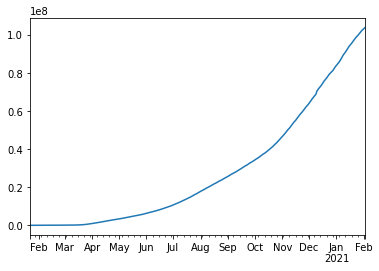

In [7]:
casos.plot()

# **MORTES POR COVID-19**

In [8]:
mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [9]:
mortes.shape

(273, 382)

In [10]:
mortes = np.sum(mortes.iloc[:, 4:mortes.shape[1]])
mortes.index = pd.DatetimeIndex(mortes.index)
mortes.tail(10)

2021-01-24    2129803
2021-01-25    2140511
2021-01-26    2157896
2021-01-27    2174552
2021-01-28    2191213
2021-01-29    2206461
2021-01-30    2219984
2021-01-31    2227910
2021-02-01    2238128
2021-02-02    2253064
dtype: int64

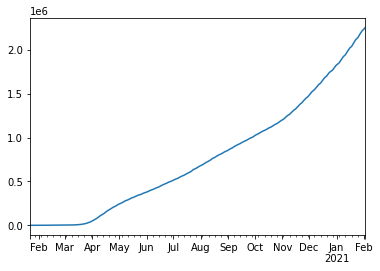

In [11]:
mortes.plot()

# **MORTALIDADE**

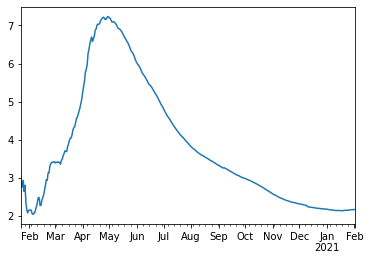

In [12]:
mortalidade = (mortes/casos)*100
mortalidade.plot()

# **RECUPERADOS** até hoje

In [13]:
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [14]:
recuperados.shape

(258, 382)

In [15]:
recuperados = np.sum(recuperados.iloc[:, 4:recuperados.shape[1]])
recuperados.index = pd.DatetimeIndex(recuperados.index)
recuperados.tail(10)

2021-01-24    54745027
2021-01-25    55057785
2021-01-26    55388199
2021-01-27    55890978
2021-01-28    56043916
2021-01-29    56408992
2021-01-30    56762214
2021-01-31    57049348
2021-02-01    57320703
2021-02-02    57671339
dtype: int64

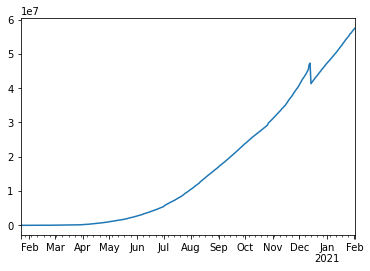

In [16]:
recuperados.plot()

# **CASOS ATIVOS (que podem transmitir o vírus)**

In [17]:
ativos = casos - (recuperados+mortes)
ativos.tail

<bound method NDFrame.tail of 2020-01-22         510
2020-01-23         605
2020-01-24         876
2020-01-25        1349
2020-01-26        2006
                ...   
2021-01-29    43453768
2021-01-30    43601637
2021-01-31    43688611
2021-02-01    43854167
2021-02-02    43945435
Length: 378, dtype: int64>

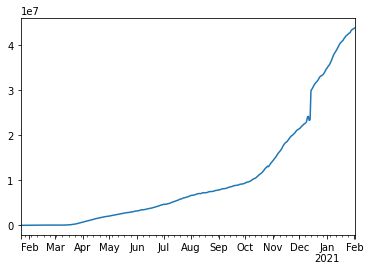

In [18]:
ativos.plot()

# **COMPARATIVOS**
casos, ativos, recuperados, mortes

In [19]:
df = pd.concat([casos, ativos, recuperados, mortes], axis=1)
df.columns = (['casos', 'ativos', 'recuperados', 'mortes'])

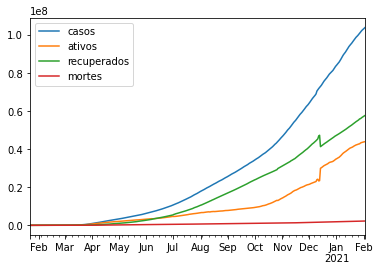

In [20]:
df.plot()